In [2]:
import pandas as pd
mechcare= pd.read_csv("mechcare.csv")

In [3]:
mechcare.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,HDF
0,2,298.1,308.6,1551,42.8,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0
2,1,298.1,308.5,1498,49.4,5,0,0
3,1,298.2,308.6,1433,39.5,7,0,0
4,1,298.2,308.7,1408,40.0,9,0,0


In [4]:
mechcare.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   HDF                      10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [6]:
mechcare['HDF'].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [7]:
mechcare.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,HDF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.011500
std,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.106625
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000
25%,1.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000
50%,1.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000
75%,2.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000
max,3.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000


In [6]:
%matplotlib inline


array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Machine failure'}>, <Axes: >, <Axes: >]],
      dtype=object)

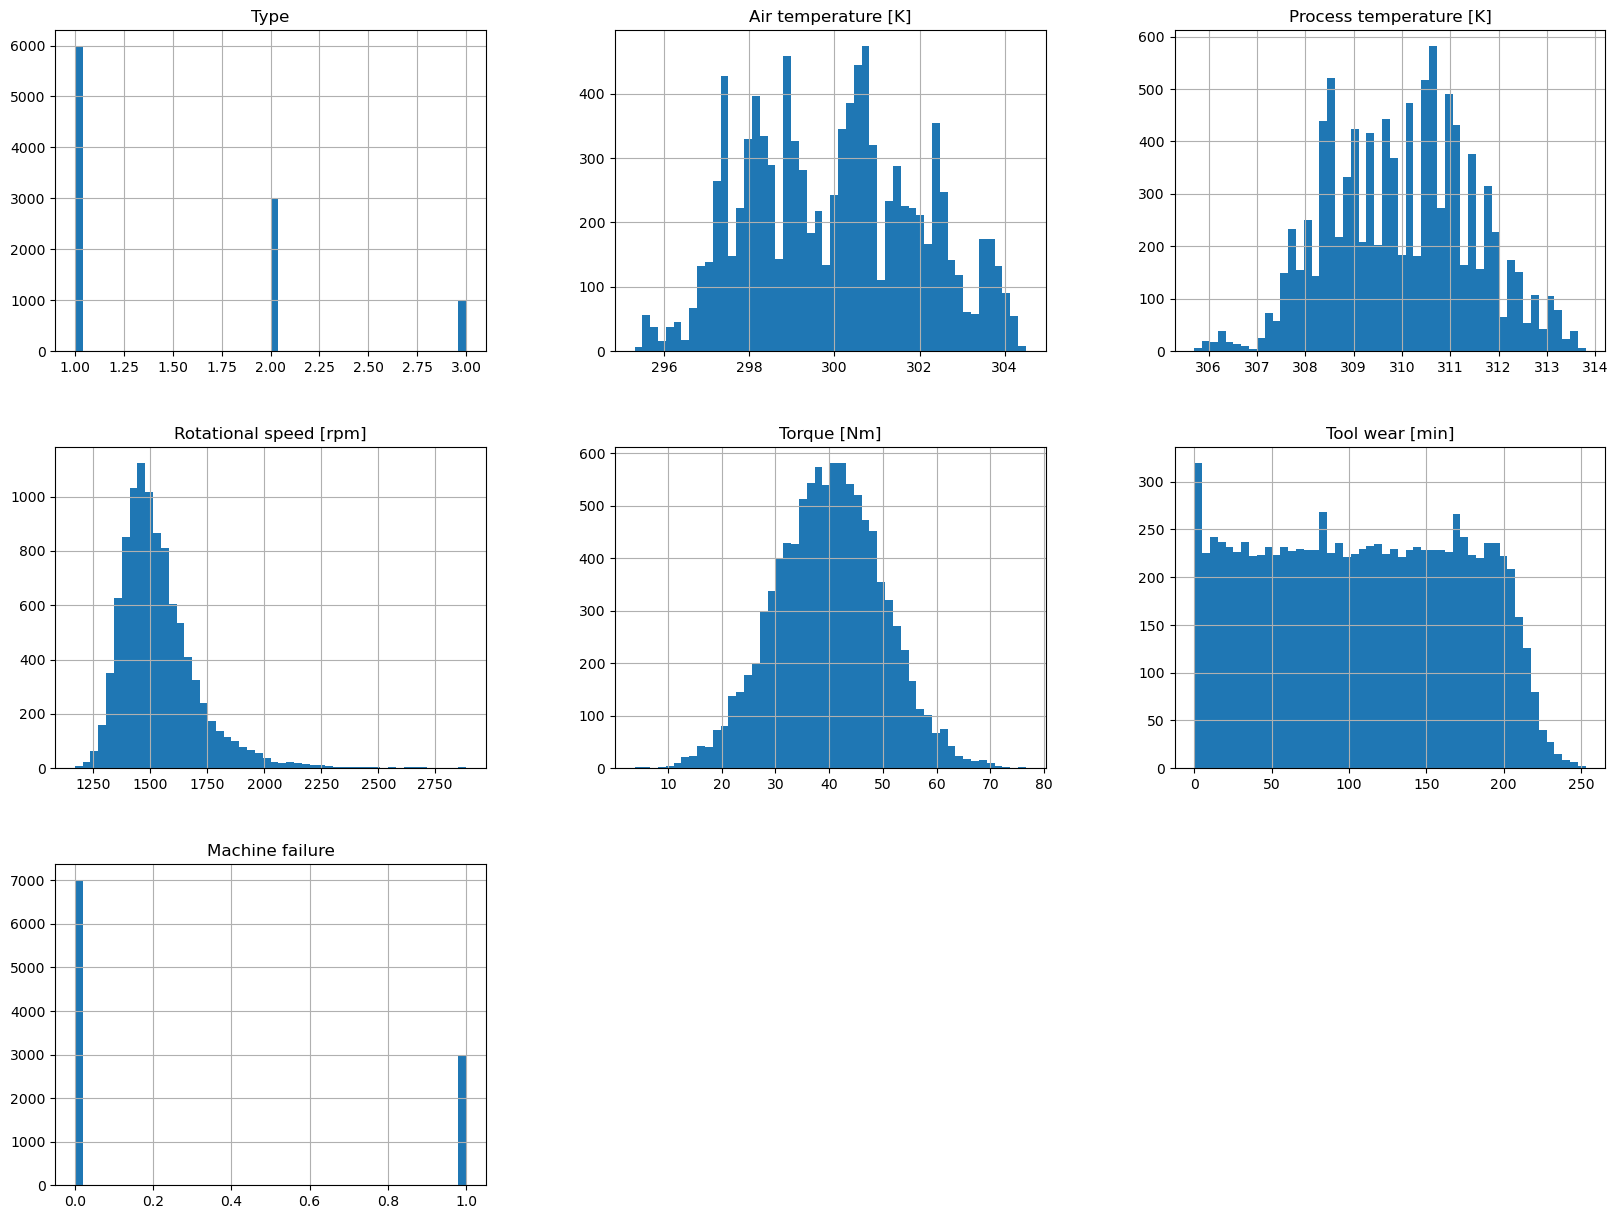

In [7]:
import matplotlib.pyplot as plt
mechcare.hist(bins=50,figsize=(20,15))


In [8]:
#mechcare['TWF'].value_counts()
mechcare['Machine failure'].value_counts()


0    7011
1    2989
Name: Machine failure, dtype: int64

In [9]:
#mechcare['HDF'].value_counts()


In [10]:
#mechcare['PWF'].value_counts()


In [11]:
#mechcare['OSF'].value_counts()


In [12]:
#mechcare['RNF'].value_counts()

In [13]:
46+115+95+98


354

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
print(mechcare)

      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     3                298.9                    308.4   
9997     2                299.0                    308.6   
9998     3                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4 

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(mechcare, mechcare['HDF']):
    strat_train_set = mechcare.loc[train_index]
    strat_test_set = mechcare.loc[test_index]
    
print(type(strat_test_set))

<class 'pandas.core.frame.DataFrame'>


In [16]:
#strat_train_set['OSF'].value_counts()

In [17]:
corr_matrix = mechcare.corr()
print(corr_matrix)
corr_matrix['Machine failure'].sort_values(ascending=False)

                             Type  Air temperature [K]  \
Type                     1.000000            -0.015176   
Air temperature [K]     -0.015176             1.000000   
Process temperature [K] -0.012101             0.876107   
Rotational speed [rpm]  -0.003979             0.022670   
Torque [Nm]             -0.003097            -0.013778   
Tool wear [min]         -0.007255             0.013853   
Machine failure          0.016793            -0.011056   

                         Process temperature [K]  Rotational speed [rpm]  \
Type                                   -0.012101               -0.003979   
Air temperature [K]                     0.876107                0.022670   
Process temperature [K]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Torque [Nm]                            -0.014061               -0.875027   
Tool wear [min]                         0.013488                0.000223   
Mac

Machine failure            1.000000
Process temperature [K]    0.017239
Type                       0.016793
Torque [Nm]               -0.002042
Rotational speed [rpm]    -0.004211
Air temperature [K]       -0.011056
Tool wear [min]           -0.020377
Name: Machine failure, dtype: float64

array([[<Axes: xlabel='Machine failure', ylabel='Machine failure'>,
        <Axes: xlabel='Type', ylabel='Machine failure'>,
        <Axes: xlabel='Air temperature [K]', ylabel='Machine failure'>,
        <Axes: xlabel='Process temperature [K]', ylabel='Machine failure'>,
        <Axes: xlabel='Rotational speed [rpm]', ylabel='Machine failure'>,
        <Axes: xlabel='Torque [Nm]', ylabel='Machine failure'>,
        <Axes: xlabel='Tool wear [min]', ylabel='Machine failure'>],
       [<Axes: xlabel='Machine failure', ylabel='Type'>,
        <Axes: xlabel='Type', ylabel='Type'>,
        <Axes: xlabel='Air temperature [K]', ylabel='Type'>,
        <Axes: xlabel='Process temperature [K]', ylabel='Type'>,
        <Axes: xlabel='Rotational speed [rpm]', ylabel='Type'>,
        <Axes: xlabel='Torque [Nm]', ylabel='Type'>,
        <Axes: xlabel='Tool wear [min]', ylabel='Type'>],
       [<Axes: xlabel='Machine failure', ylabel='Air temperature [K]'>,
        <Axes: xlabel='Type', ylabel='Air t

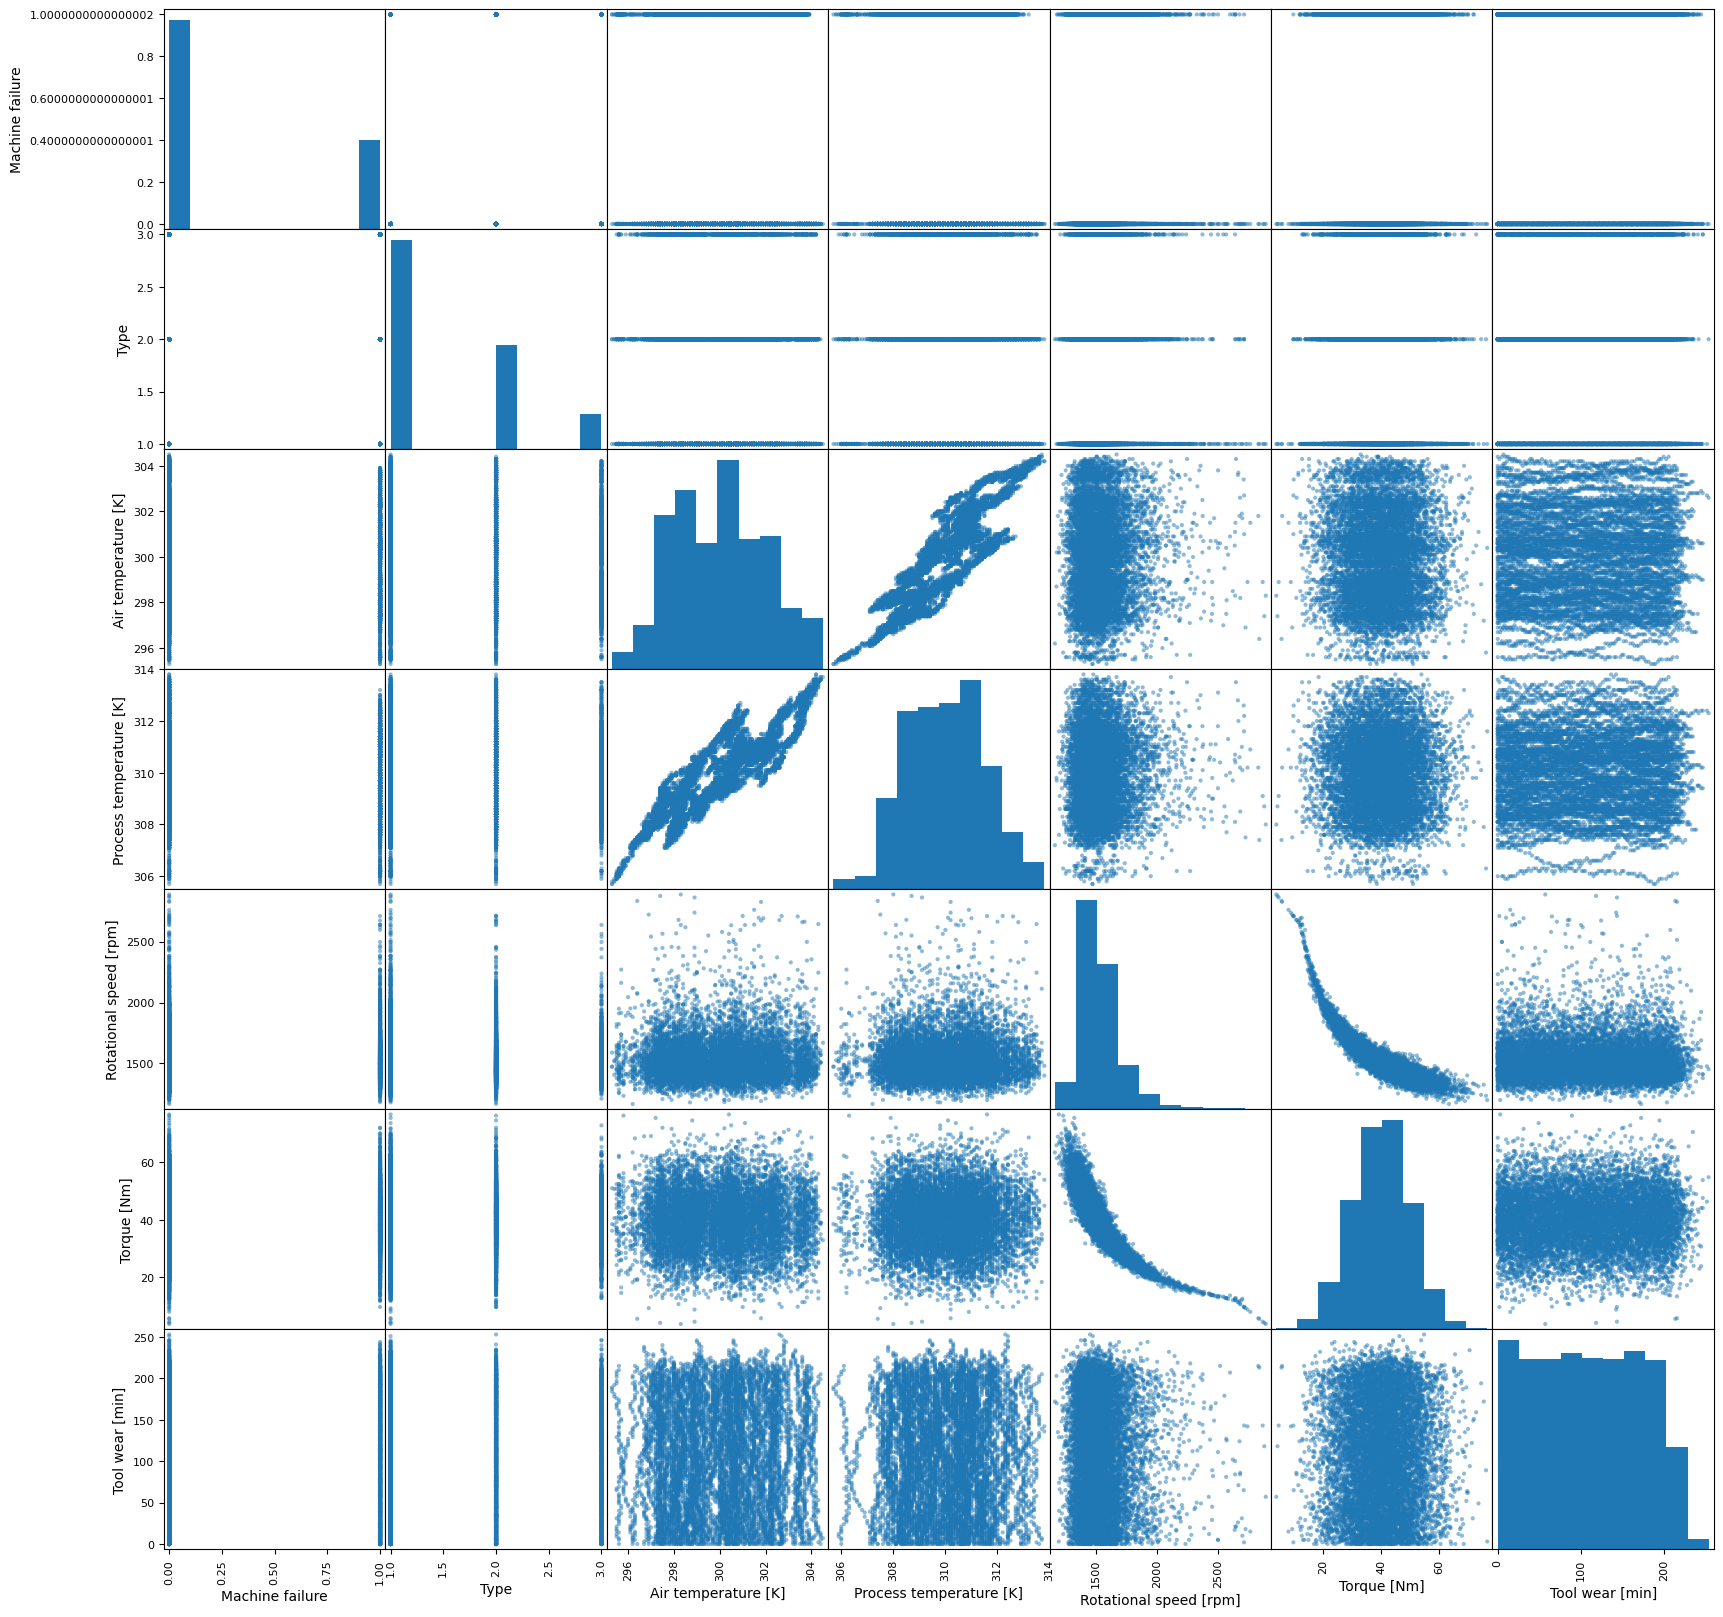

In [18]:
from pandas.plotting import scatter_matrix
attributes = ['Machine failure','Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
scatter_matrix(mechcare[attributes], figsize = (20,20))

In [10]:
mechcare = strat_train_set.drop(labels=['HDF'], axis=1)
ris = ['HDF']
mech_labels = strat_train_set[ris].copy()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [12]:
mech_num_tr=my_pipeline.fit_transform(mechcare)

In [13]:
mech_num_tr.shape
print(mech_num_tr)

[[ 0.75462913  1.84575912  1.61579269 ... -0.25823663  0.60591114
  -0.18689261]
 [-0.73820793  0.54667207  0.60332782 ...  2.78597672 -1.53401952
   5.35066628]
 [-0.73820793 -0.50259055 -0.94911832 ...  1.41857597  0.03945891
  -0.18689261]
 ...
 [ 0.75462913  1.09628582  0.40083484 ...  1.14908823  0.29121545
   5.35066628]
 [ 0.75462913  0.64660184  0.73832313 ...  0.30070091  0.46429808
  -0.18689261]
 [ 0.75462913  0.29684764  0.40083484 ...  1.27884159 -0.51125854
  -0.18689261]]


In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [15]:
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

In [16]:
from sklearn.metrics import accuracy_score
for name, md in models.items():
    md.fit(mech_num_tr,mech_labels)
    ypred = md.predict(mech_num_tr)
    
    print(f"{name} with accuracy : {accuracy_score(mech_labels,ypred)}")

D:\Program Files\New folder\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\New folder\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\New folder\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\New folder\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Linear Discriminant Analysis with accuracy : 0.979125
Logistic Regression with accuracy : 0.99925
Naive Bayes with accuracy : 0.9875
Support Vector Machine with accuracy : 0.999125


D:\Program Files\New folder\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors with accuracy : 0.998125
Decision Tree with accuracy : 1.0


C:\Users\Aaryaman\AppData\Local\Temp\ipykernel_25152\1325984349.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  md.fit(mech_num_tr,mech_labels)


Random Forest with accuracy : 1.0
Bagging with accuracy : 0.99975


D:\Program Files\New folder\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\New folder\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost with accuracy : 1.0


D:\Program Files\New folder\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting with accuracy : 1.0
Extra Trees with accuracy : 1.0


In [19]:
X_test = strat_test_set.drop("HDF", axis=1)
Y_test = strat_test_set["HDF"].copy()

In [20]:
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = md.predict(X_test_prepared)

In [21]:
rfc = DecisionTreeClassifier()
rfc.fit(mech_num_tr,mech_labels)
ypred = rfc.predict(mech_num_tr)
accuracy_score(mech_labels,ypred)

1.0

In [29]:
for name, md in models.items():
    md.fit(X_test,Y_test)
    ypred = md.predict(X_test)
    
    print(f"{name} with accuracy : {accuracy_score(Y_test,ypred)}")

Linear Discriminant Analysis with accuracy : 0.701
Logistic Regression with accuracy : 0.701
Naive Bayes with accuracy : 0.7015
Support Vector Machine with accuracy : 0.701
K-Nearest Neighbors with accuracy : 0.743
Decision Tree with accuracy : 1.0
Random Forest with accuracy : 1.0
Bagging with accuracy : 0.9755
AdaBoost with accuracy : 0.7155
Gradient Boosting with accuracy : 0.7635
Extra Trees with accuracy : 1.0


In [22]:
def recommendation(T,AT,P,R,To,TW,MF):
    features = np.array([[T,AT,P,R,T,TW,MF]])
    prediction = rfc.predict(features).reshape(1,-1)
    
    return prediction[0]

In [23]:
T=1
AT=298.9
P=308.7
R=1727
To=40.7
TW=106
MF=1

predict = recommendation(T,AT,P,R,To,TW,MF)





In [32]:
print(predict)


[0]


In [27]:
import random
i=0
while(i<1000):
    T = random.randint(1,3)
    AT = random.uniform(0,8)
    P = random.uniform(0,8)
    R = random.uniform(1000,1100)
    To = random.uniform(30,50)
    TW = random.uniform(90,170)
    MF=1
    
    predict = recommendation(T,AT,P,R,To,TW,MF)
    print ( predict)    
    i = i+1

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
